In [2]:
#importing openCV C++ library who provide wide range of functions
import cv2

#importing python library for numerical computing 
import numpy as np

#inlcluding python library for data visualization
import matplotlib.pyplot as plt

dummy dataset operations 


In [5]:
import cv2
import pandas as pd
import numpy as np
import os
#import joblib
#from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
import cleanup
import warnings
warnings.filterwarnings('ignore')




input1 = 'C://Users/cheta/cvlab/CV_CP/dummy_VBGR/dummy_dataset'
input4 = 'C://Users/cheta/cvlab/CV_CP/dummy_VBGR/dummy_preprocessing'

MIN_ASPECT_RATIO = 0.5
MAX_ASPECT_RATIO = 1.5

temp = ['front__crosswalk']
for i in temp:
    count = 0
    for filename in os.listdir(input1 + i):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Load the image
            img = cv2.imread(os.path.join(input1 + i, filename), cv2.IMREAD_GRAYSCALE)
            
            
    
            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply Gaussian blur
            blur = cv2.GaussianBlur(gray, (5, 5), 0)
            
            # Apply Canny edge detection
            edges = cv2.Canny(blur, 50, 150, apertureSize=3)
            
            # Apply Hough transform
            lines = cv2.HoughLinesP(edges, 1, cv2.cv2.pi / 180, 100, minLineLength=100, maxLineGap=10)
            
            # Find intersection points
            corners = []
            for i in range(len(lines)):
                for j in range(i+1, len(lines)):
                    line1 = lines[i][0]
                    line2 = lines[j][0]
                    x1,y1,x2,y2 = line1
                    x3,y3,x4,y4 = line2
                    denom = ((y4-y3)*(x2-x1)) - ((x4-x3)*(y2-y1))
                    if denom != 0:
                        ua = (((x4-x3)*(y1-y3)) - ((y4-y3)*(x1-x3))) / denom
                        if 0 <= ua <= 1:
                            x = int(x1 + ua*(x2-x1))
                            y = int(y1 + ua*(y2-y1))
                            corners.append((x, y))
            
            # Apply perspective transform
            if len(corners) == 4:
                src = np.float32([corners[0], corners[1], corners[3], corners[2]])
                dst = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
                M = cv2.getPerspectiveTransform(src, dst)
                warped = cv2.warpPerspective(img, M, (300, 300))
                
                # Find contours in the warped image
                contours, hierarchy = cv2.findContours(cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                
                # Loop through the contours and filter by aspect ratio
                for contour in contours:
                    x, y, w, h = cv2.boundingRect(contour)
                    aspect_ratio = float(w) / h
                    if MIN_ASPECT_RATIO <= aspect_ratio <= MAX_ASPECT_RATIO:
                        # Draw a bounding box around the zebra crossing
                        cv2.rectangle(warped, (x, y), (x+w, y+h), (0, 255, 0), 2)


            # Save the processed image
            cv2.imwrite(os.path.join(input4 + i, filename),  warped)
            count +=1
    print(i + ' : ' + str(count))

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import pytesseract

# Load the OCR engine
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define the minimum and maximum aspect ratio for the bounding box of the zebra crossing
MIN_ASPECT_RATIO = 0.5
MAX_ASPECT_RATIO = 1.5

# Loop through the images
for i in range(1, 51):
    # Load the image
    filename = f'zebra_crossing_{i}.jpg'
    img = cv2.imread(filename)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detection
    edges = cv2.Canny(blur, 50, 150, apertureSize=3)
    
    # Apply Hough transform
    lines = cv2.HoughLinesP(edges, 1, cv2.cv2.pi / 180, 100, minLineLength=100, maxLineGap=10)
    
    # Find intersection points
    corners = []
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            x1,y1,x2,y2 = line1
            x3,y3,x4,y4 = line2
            denom = ((y4-y3)*(x2-x1)) - ((x4-x3)*(y2-y1))
            if denom != 0:
                ua = (((x4-x3)*(y1-y3)) - ((y4-y3)*(x1-x3))) / denom
                if 0 <= ua <= 1:
                    x = int(x1 + ua*(x2-x1))
                    y = int(y1 + ua*(y2-y1))
                    corners.append((x, y))
    
    # Apply perspective transform
    if len(corners) == 4:
        src = np.float32([corners[0], corners[1], corners[3], corners[2]])
        dst = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(img, M, (300, 300))
        
        # Find contours in the warped image
        contours, hierarchy = cv2.findContours(cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Loop through the contours and filter by aspect ratio
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            aspect_ratio = float(w) / h
            if MIN_ASPECT_RATIO <= aspect_ratio <= MAX_ASPECT_RATIO:
                # Draw a bounding box around the zebra crossing
                cv2.rectangle(warped, (x, y), (x+w, y+h), (0, 255, 0), 2)
                
                # Perform OCR on the zebra crossing
                text = pytesseract.image_to_string(warped[y:y+h, x:x+w], config='--psm 11')
                print(f'{filename}: {text}')
                
                # Display the result


import cv2
import numpy as np

# Load the Canny edge-detected image
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/front_crosswalk/c1_p1_7.jpg', 0)

# Perform Hough line transform on the image
lines = cv2.HoughLinesP(img, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

# Create a blank image of the same size as the original image
result = np.zeros_like(img)

# Filter out the short lines and draw the long lines on the blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if length > 100:  # adjust this threshold to your liking
        cv2.line(result, (x1, y1), (x2, y2), (255, 255, 255), thickness=2)

# Display the final result
cv2.imshow('Filtered Edges', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [118]:
import cv2
import numpy as np

# Load the Canny edge-detected image
img = cv2.imread("C:/Users/cheta/cvlab/CV_CP/VBGR/Resize_images/canny_edge_without_Otsu/left__crosswalk/c2_p1_32.jpg", 0)

#img = cv2.Canny(img, 100, 200)

cv2.imshow('Filtered Edges', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Perform Hough line transform on the image
lines = cv2.HoughLinesP(img, 1, np.pi/180, threshold=50, minLineLength=120, maxLineGap=100)


# Create a blank image of the same size as the original image
result = np.zeros_like(img)

# Filter out the short lines and draw the long lines on the blank image
for line in lines:
    x1, y1, x2, y2 = line[0]
    m = (y2-y1)/(x2-x1)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if length > 0:  # adjust this threshold to your liking
        cv2.line(result, (x1, y1), (x2, y2), (255, 255, 255), thickness=2)


# Display the final result
cv2.imshow('Filtered Edges', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

finding contours


In [117]:


import cv2
import numpy as np

# Load the Canny edge-detected image
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/left_crosswalk/c2_p1_26.jpg', 0)


#  Apply Canny edge detection to the input image
edge_map = cv2.Canny(img, 100, 200)

# Display the output image
cv2.imshow("Output", edge_map)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find the contours in the edge map
contours, hierarchy = cv2.findContours(edge_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours with a perimeter below a certain threshold
min_perimeter = 100  # adjust this threshold to your liking
contours = [c for c in contours if cv2.arcLength(c, closed=True) >= min_perimeter]

# Draw the filtered contours on a black background
output_image = np.zeros_like(img)
cv2.drawContours(output_image, contours, -1, (255, 255, 255), thickness=1)

#-------------------------------------------------------------------------------



# Display the output image
cv2.imshow("Output", output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


finding contours and colouring them


In [116]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/left_crosswalk/c2_p1_45.jpg')

# Convert the image to grayscale


# Apply edge detection
edges = cv2.Canny(img, 100, 150)

# Find contours in the image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#----------------------------------------------------------------------

# Filter out contours with a perimeter below a certain threshold
min_perimeter = 110  # adjust this threshold to your liking
contours = [c for c in contours if cv2.arcLength(c, closed=True) >= min_perimeter]


# Draw and color the contours on the original image
color = (0, 0, 255) # Green
thickness = 2
cv2.drawContours(img, contours, -1, color, thickness)

# Display the image with the contours
cv2.imshow('Zebra Crossing with Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


ROI


In [128]:
import cv2
import numpy as np

# Load image
edges = cv2.imread("C:/Users/cheta/cvlab/CV_CP/VBGR/Resize_images/outer_edge_detected/front__crosswalk/c1_p1_17.jpg",0)
print(img.shape)
# Convert to grayscale


# Apply canny edge detection


cv2.imshow('Zebra Crossing with Contours', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Find contours of zebra crossing
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Select largest contour as zebra crossing
largest_contour = max(contours, key=cv2.contourArea)

# Create binary mask of zebra crossing
mask = np.zeros_like(edges)
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply mask to original image
roi = cv2.bitwise_and(img, img, mask=mask)

# Show ROI
cv2.imshow("ROI", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

(200, 200)


binary mask


In [138]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("C:/Users/cheta/cvlab/CV_CP/VBGR/Resize_images/outer_edge_detected/front__crosswalk/c1_p1_17.jpg",0)
print(img.shape)
cv2.imshow('Result', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

gray=img

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edge image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour as the zebra crossing
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, [contours], color=(255, 255, 255))
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow('Result', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('No contours found in image')


(200, 200)


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'fillPoly'
> Overload resolution failed:
>  - Can't parse 'pts'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pts'. Sequence item with index 0 has a wrong type


In [1]:
import cv2

# Read the image and apply Canny edge detection
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/front_crosswalk/c1_p1_7.jpg')
edges = cv2.Canny(img, 100, 200)

# Create a binary mask of the detected edges
_, binary = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY)

# Find the contours of the white regions in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours to find the one corresponding to the zebra-crossing
for contour in contours:
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if area > 5000 and aspect_ratio > 1.5:
        # Found the zebra-crossing contour, extract the ROI
        roi = img[y:y+h, x:x+w]
        break


In [1]:
import cv2
import numpy as np

# Read the image and apply Canny edge detection
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/front_crosswalk/c1_p1_7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

cv2.imshow('canny edge', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply morphological operations to remove noise and fill gaps
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
edges = cv2.dilate(edges, kernel, iterations=1)

cv2.imshow('morphological operator', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Apply Hough transform to detect straight lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)



# Filter lines to keep only the ones corresponding to the zebra-crossing
filtered_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    angle = np.arctan2(y2-y1, x2-x1) * 180 / np.pi
    if length > 100 and abs(angle) < 10 and abs(y1-y2) < 10 and abs(x1+x2-2*gray.shape[1]/2) < 50:
        filtered_lines.append(line)

# Find intersection points of the filtered lines
points = []
for i in range(len(filtered_lines)):
    for j in range(i+1, len(filtered_lines)):
        x1, y1, x2, y2 = filtered_lines[i][0]
        x3, y3, x4, y4 = filtered_lines[j][0]
        det = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
        if det != 0:
            pt = ((x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4)) / det, ((x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4)) / det
            if 0 <= pt[0] < gray.shape[1] and 0 <= pt[1] < gray.shape[0]:
                points.append(pt)

# Draw the filtered lines and intersection points on the image
output = img.copy()
for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 2)
for pt in points:
    cv2.circle(output, (int(pt[0]), int(pt[1])), 5, (0, 255, 0), -1)

# Display the output image
cv2.imshow('output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()



Harris corner detection


In [6]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('C:/Users/cheta/cvlab/CV_CP/Zebra_crossing_dataset_new/front_crosswalk/c1_p1_7.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define the maximum number of corners to detect
max_corners = 1000

# Define the quality level for corner detection
quality_level = 0.01

# Define the minimum distance between detected corners
min_distance = 10

# Apply the Shi-Tomasi corner detection algorithm
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality_level, min_distance)

# Convert the corners to integers
corners = np.int0(corners)

# Draw the detected corners on the image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 3, (0, 255, 0), -1)

# Display the image with the detected corners
cv2.imshow('Corners Detected', img)
cv2.waitKey(0)
cv2.destroyAllWindows()



C:\Users\cheta\AppData\Local\Temp\ipykernel_18724\994890584.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [3]:
cv2.imshow('edges')
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [2]:
import cv2
import numpy as np

# read the input image
img = cv2.imread('C:/users/cheta/cvlab/CV_CP/VBGR/Resize_images/front__crosswalk/c1_p1_7.jpg', cv2.IMREAD_GRAYSCALE)

# apply Sobel operator in x direction with kernel size 3x3
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# threshold the resulting image to only keep horizontal edges
threshold_value = 50
ret, thresh = cv2.threshold(sobelx, threshold_value, 255, cv2.THRESH_BINARY)

# show the resulting image
cv2.imshow('Horizontal Edges', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
#defining kernel for prewitt kernel
def prewitt_kernel_ver_hor_3(path):

    
    #prewitt Kernel horizontal edge detection
    kernel3h = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])
    
    #prewitt Kernel vertical edge detection
    kernel3v = np.array([[1, 1, 1],
                       [0, 0, 0],
                       [1, 1, 1]])
    
    #prewitt Kernel horizontal edge detection
    kernel5h = np.array([[-2, -1, 0, 1, 2],
                       [-2, -1, 0, 1, 2],
                       [-2, -1, 0, 1, 2],
                       [-2, -1, 0, 1, 2],
                       [-2, -1, 0, 1, 2]])
    
    #prewitt Kernel vertical edge detection
    kernel5v = np.array([[2, 2, 2, 2, 2],
                       [1, 1, 1, 1, 1],
                       [0, 0, 0, 0, 0],
                       [1, 1, 1, 1, 1],
                       [2, 2, 2, 2, 2]])

    
    #performing convolution by applying kernels
    out3h = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3h)
    
    out3v = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3v)
    
    out5h = cv2.filter2D(src=image, ddepth=-5, kernel=kernel5h)
    
    out5v = cv2.filter2D(src=image, ddepth=-5, kernel=kernel5v)
        
    

    plt.imshow(image, 'gray')
    plt.title('Input Image')
    plt.show() 
    
    plt.imshow(out3h, 'gray')
    plt.title('Prewitt kernel applied image 3*3 ')
    plt.show() 
    
    plt.imshow(out3v, 'gray')
    plt.title('Prewitt kernel applied image 3*3 ')
    plt.show()
    
    plt.imshow(out5h, 'gray')
    plt.title('Prewitt kernel horizontal  5*5 ')
    plt.show()
    
    plt.imshow(out5v, 'gray')
    plt.title('Prewitt kernel verticle  5*5 ')
    plt.show()

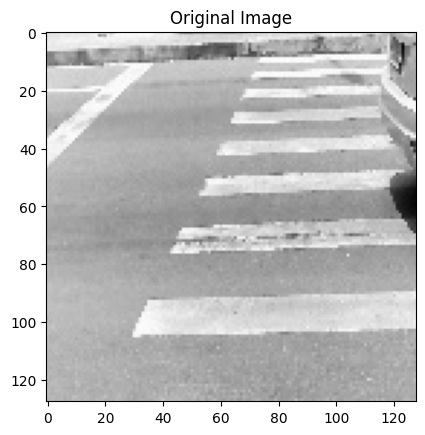

In [4]:
image = cv2.imread(r"C:/users/cheta/cvlab/CV_CP/VBGR/Resize_images/front__crosswalk/c1_p1_7.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#converting image to gray
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]

plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()


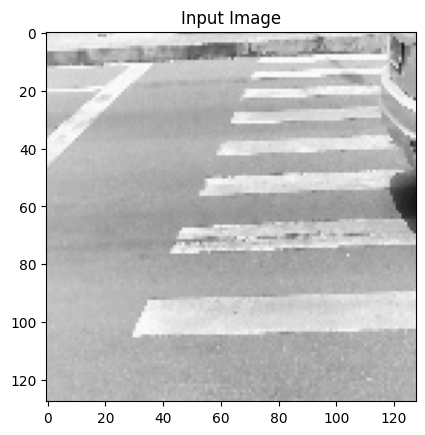

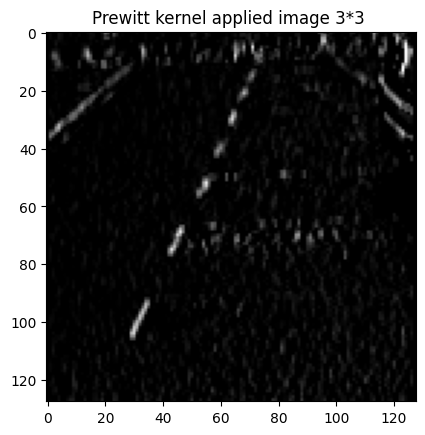

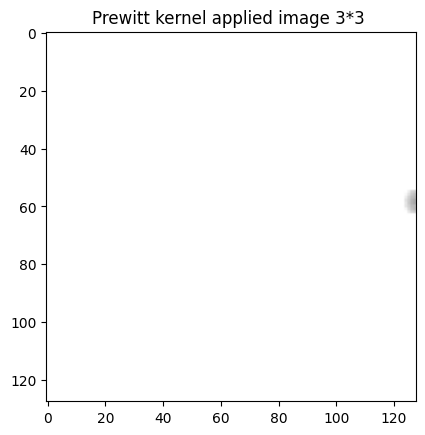

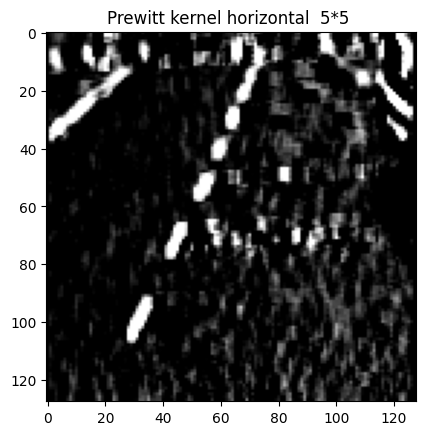

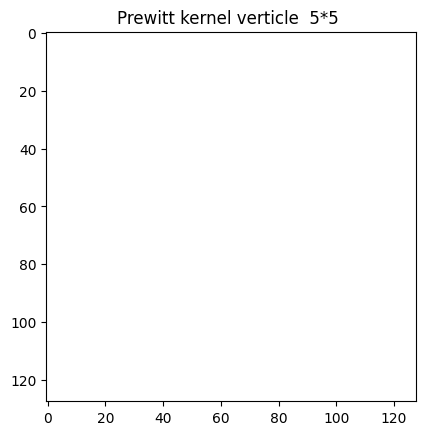

In [5]:
prewitt_kernel_ver_hor_3(gray)

In [10]:
#defining kernel for soble  kernel

def sobel_kernel_ver_hor_3(path):

   #sobel Kernel horizontal edge detection 
    kernel3h = np.array([[1, 0, -1],
                       [2, 0, -2],
                       [1, 0, -1]])
    
    #sobel Kernel verticle edge detection
    kernel3v = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]])
    
    #sobel Kernel horizontal edge detection
    kernel5h = np.array([[-1, -2, -1, 0, 1],
                       [-2, -4, -2, 0, 2],
                       [-1, -2, -1, 0, 1],
                       [0, 0, 0, 0, 0],
                       [1, 2, 1, 0, -1]])
    
    #sobel Kernel verticle edge detection
    kernel5v = np.array([[1, 2, 1, 0, -1],
                       [2, 4, 2, 0, -2],
                       [1, 2, 1, 0, -1],
                       [0, 0, 0, 0, 0],
                       [-1, -2, -1, 0, 1]])


    
    # another kernal without 1/9
    out3h = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3h)
    
    out3v = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3v)
    
    out5h = cv2.filter2D(src=image, ddepth=-10, kernel=kernel5h)
    
    out5v = cv2.filter2D(src=image, ddepth=-10, kernel=kernel5v)

    plt.imshow(image, 'gray')
    plt.title('Input Image')
    plt.show() 
    
    plt.imshow(out3h, 'gray')
    plt.title('Prewitt kernel applied image 3*3 ')
    plt.show() 
    
    plt.imshow(out3v, 'gray')
    plt.title('Prewitt kernel applied image 3*3 ')
    plt.show()
    
    plt.imshow(out5h, 'gray')
    plt.title('Prewitt kernel horizontal  5*5 ')
    plt.show()
    
    plt.imshow(out5v, 'gray')
    plt.title('Prewitt kernel verticle  5*5 ')
    plt.show()

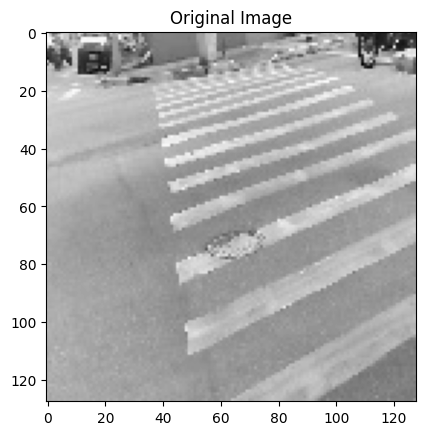

In [13]:
image = cv2.imread(r"C:/users/cheta/cvlab/CV_CP/VBGR/Resize_images/front__crosswalk/c1_p1_14.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]

plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

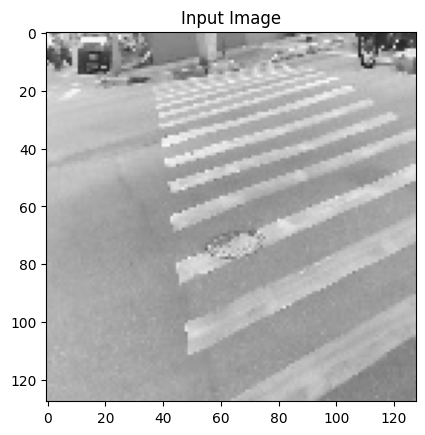

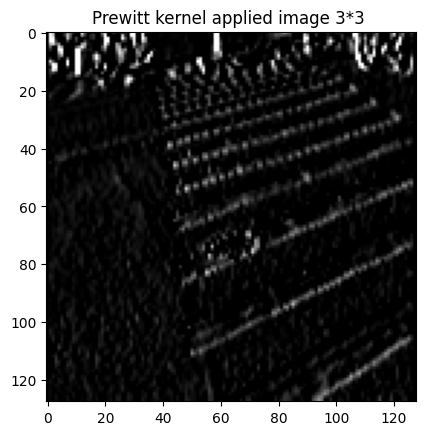

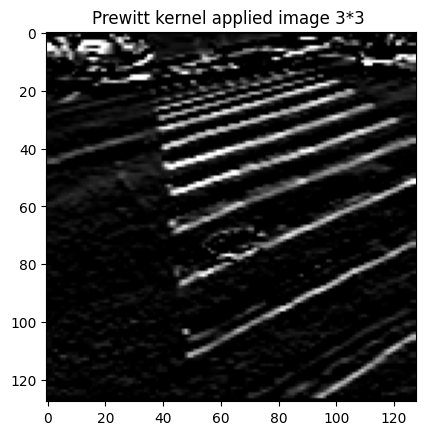

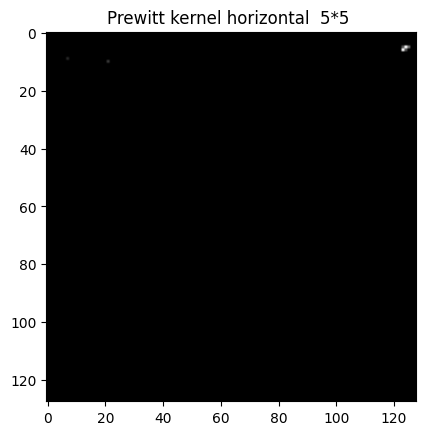

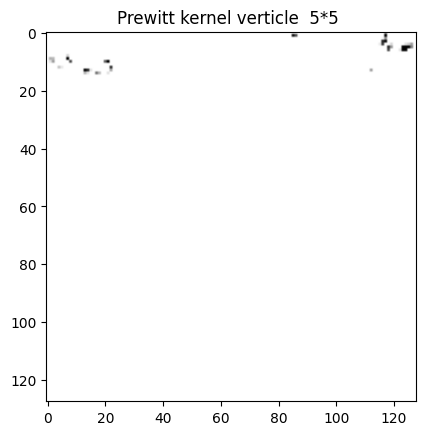

In [14]:
sobel_kernel_ver_hor_3(gray)

In [52]:
#defining function for robert kernel

def robert_kernel(path):
    
    #robert Kernel horizontal edge detection
    kernel3h = np.array([[1, 0],
                       [0, -1]])
    
    #robert Kernel vertical edge detection
    kernel3v = np.array([[0, 1],
                       [-1, 0]])
    
    #robert Kernel horizontal edge detection
    kernel5v = np.array([[0, 0, 0, 0, 1],
                       [-2, -4, -2, 0, 2],
                       [-1, -2, -1, 0, 1],
                       [0, 0, 0, 0, 0],
                       [1, 2, 1, 0, -1]])
    

    #robert Kernel vertical edge detection
    kernel5h = np.array([[1, 0, 0, 0, 0],
                       [0, 0, 0, -1, 0],
                       [0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0],
                       [0, 0, -1, 0, 0]])

    
    #performing convolution by applying kernels
    out3h = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3h)
    
    out3v = cv2.filter2D(src=image, ddepth=-5, kernel=kernel3v)
    
    out5h = cv2.filter2D(src=image, ddepth=-10, kernel=kernel5h)
    
    out5v = cv2.filter2D(src=image, ddepth=-10, kernel=kernel5v)

    plt.imshow(image, 'gray')
    plt.title('Input Image')
    plt.show() 
    
    plt.imshow(out3h, 'gray')
    plt.title('robert kernel applied image 3*3 ')
    plt.show() 
    
    plt.imshow(out3v, 'gray')
    plt.title('robert kernel applied image 3*3 ')
    plt.show()
    
    plt.imshow(out5h, 'gray')
    plt.title('robert kernel horizontal  5*5 ')
    plt.show()
    
    plt.imshow(out5v, 'gray')
    plt.title('robert kernel verticle  5*5 ')
    plt.show()

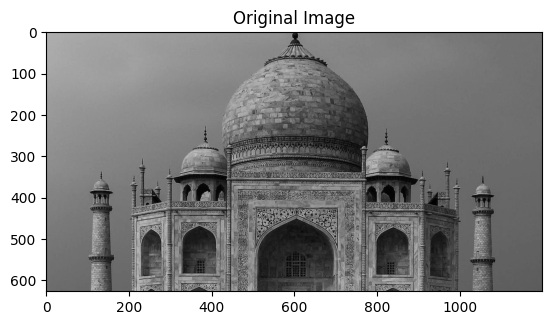

In [38]:
image = cv2.imread(r"C:\Users\cheta\Downloads\tajmahal_gray.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]

plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

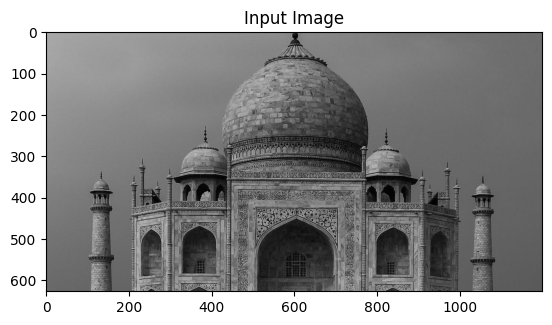

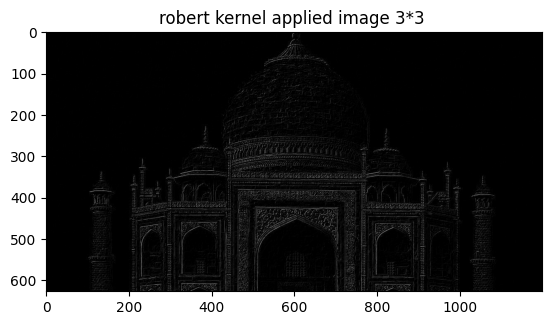

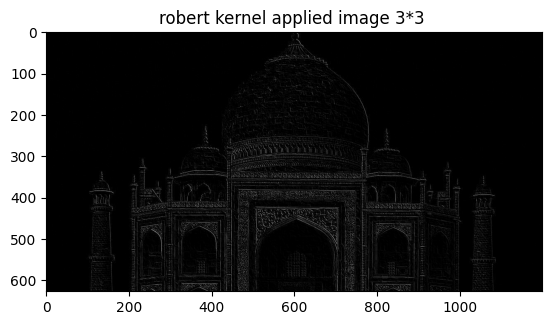

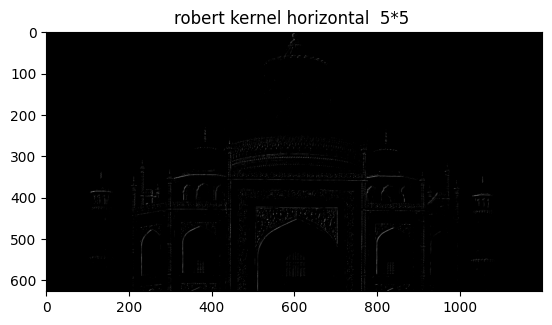

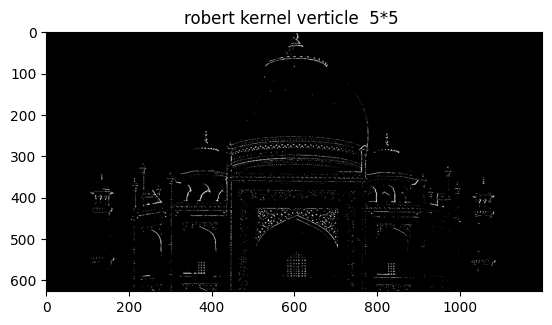

In [39]:
robert_kernel(gray)

In [53]:
#Canny Edge detection


img = cv2.imread(r"C:\Users\cheta\Downloads\tajmahal_gray.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing with sigma=1
img = cv2.GaussianBlur(img, (5, 5), 1)

# Apply the Canny edge detector
edges = cv2.Canny(img, 50, 150, apertureSize=3)

# Display the result
cv2.imshow("Canny Edge Detection", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
# Load the input image
img = cv2.imread(r"C:\Users\cheta\Downloads\matchbox.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply the Canny edge detector
edges = cv2.Canny(img, 50, 150)

# Detect lines using the Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 50)

# Draw the lines on the input image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2.imshow("Hough Line Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
img = cv2.imread(r"C:\Users\cheta\Downloads\horse.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply the Hough Circle Transform
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype("int")

# Draw the circles on the input image
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Display the result
cv2.imshow("Hough Circle Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

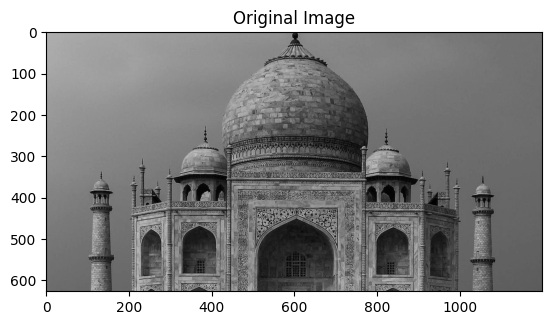

In [46]:
image = cv2.imread(r"C:\Users\cheta\Downloads\tajmahal_gray.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]

plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

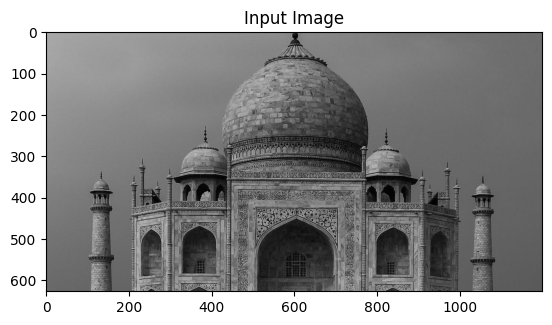

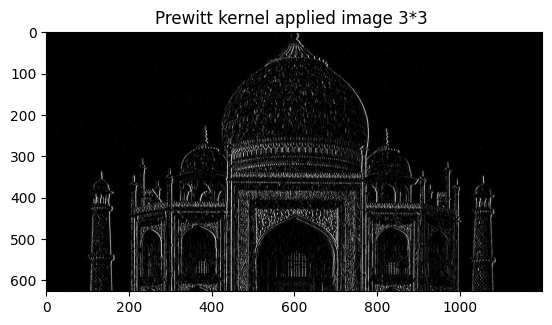

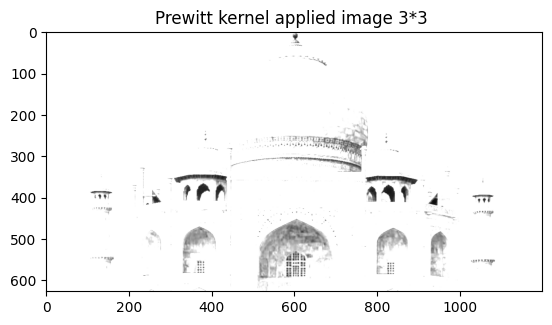

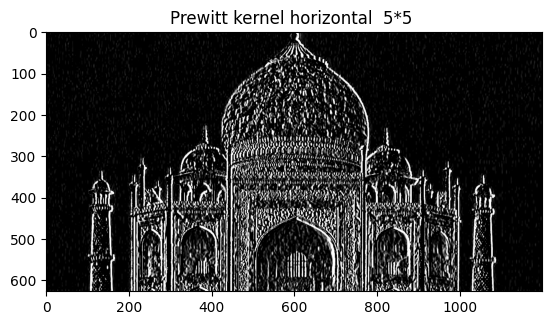

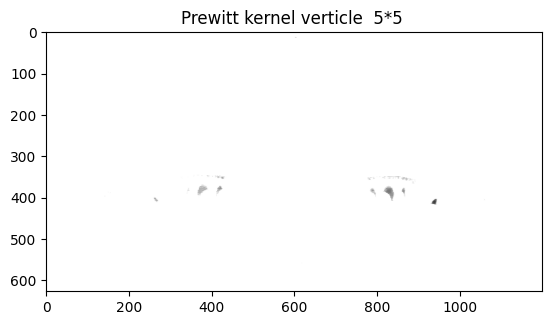

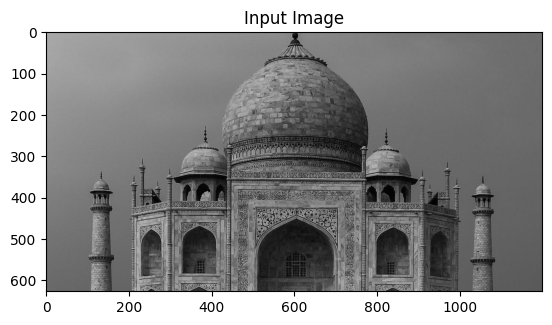

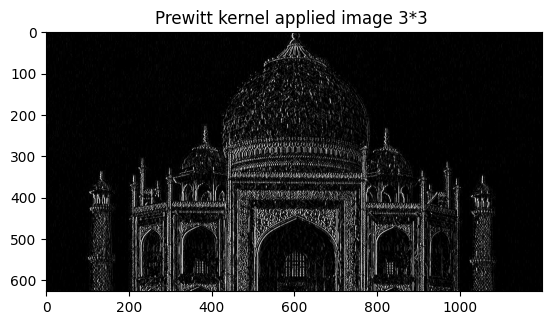

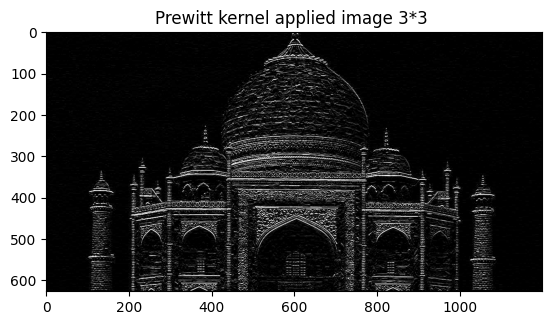

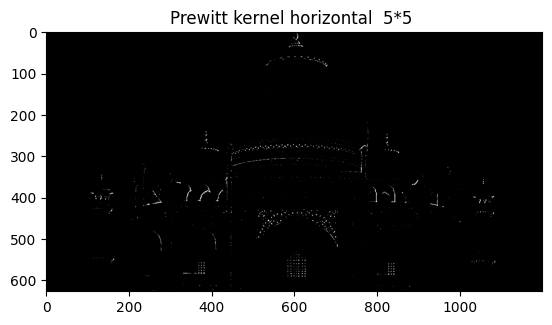

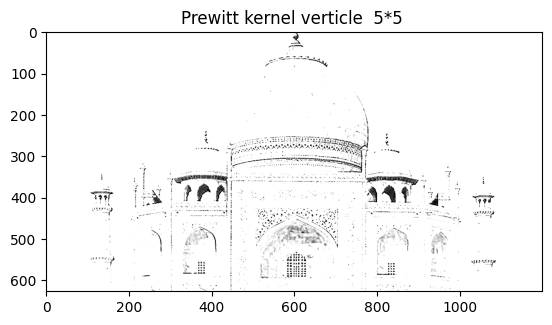

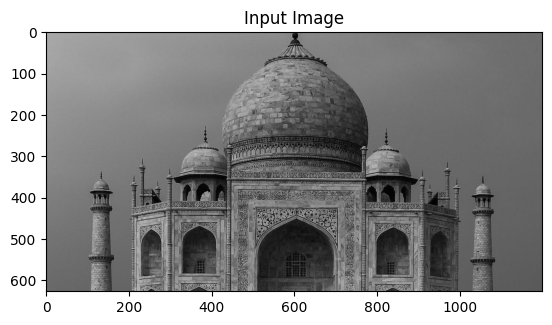

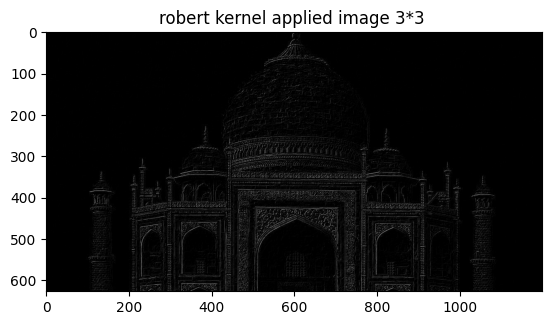

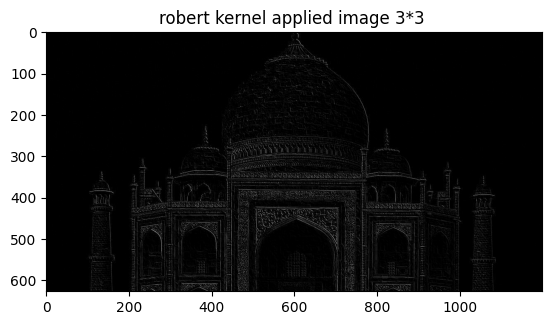

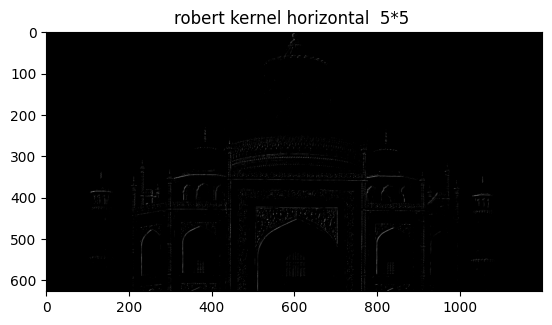

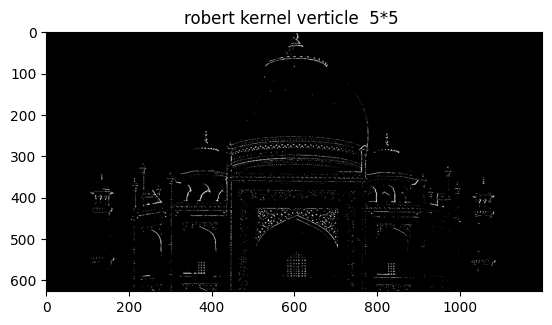

In [57]:
prewitt_kernel_ver_hor_3(gray)
sobel_kernel_ver_hor_3(gray)
robert_kernel(gray)

In [9]:
#Canny Edge detection


img = cv2.imread(r"C:\Users\cheta\cvlab\CV_CP\VBGR\Resize_images\front__crosswalk\c1_p1_15.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing with sigma=1
img = cv2.GaussianBlur(img, (5, 5), 1)

# Apply the Canny edge detector
img = cv2.Canny(img, 50, 150, apertureSize=3)

# Define the ROI that encompasses the zebra crossing
roi_corners = np.array([[(100, 100), (100, 100), (100, 100), (100, 100)]], dtype=np.int32)

# Create a blank mask with the same dimensions as the image
mask = np.zeros_like(img)

# Fill the mask with white pixels inside the ROI
cv2.fillPoly(mask, roi_corners, 255)

# Apply the mask to the image using bitwise AND operation
masked_img = cv2.bitwise_and(img, mask)

# Save the masked image to a new file
cv2.imwrite('zebra_crossing_roi.jpg', masked_img)




# Display the result
cv2.imshow("Canny Edge Detection", masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
import cv2
import numpy as np

# Read image
img = cv2.imread(r'C:\Users\cheta\cvlab\CV_CP\VBGR\Resize_images\front__crosswalk\c1_p1_65.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Apply morphological operations to clean up edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Find contours of edges
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find ROI of zebra crossing
for cnt in contours:
    # Get area of contour
    area = cv2.contourArea(cnt)
    # Set minimum and maximum area threshold
    if area > 1000 and area < 5000:
        # Draw contour on original image
        cv2.drawContours(img, [cnt], 0, (255, 0, 0), 2)

# Display image with zebra crossing ROI
cv2.imshow('Zebra Crossing ROI', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
# Load the input image
img = cv2.imread(r"C:\Users\cheta\cvlab\CV_CP\VBGR\Resize_images\front__crosswalk\c1_p1_9.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply the Canny edge detector
edges = cv2.Canny(img, 50, 150)

# Detect lines using the Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi/180, 50)

# Draw the lines on the input image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2.imshow("Hough Line Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread(r"C:\Users\cheta\Downloads\sunset.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply the Hough Circle Transform
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype("int")

# Draw the circles on the input image
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Display the result
cv2.imshow("Hough Circle Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread(r"C:\Users\cheta\Downloads\horse.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
img = cv2.GaussianBlur(img, (5, 5), 0)

# Apply the Hough Circle Transform
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Convert the (x, y) coordinates and radius of the circles to integers
circles = np.round(circles[0, :]).astype("int")

# Draw the circles on the input image
for (x, y, r) in circles:
    cv2.circle(img, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Display the result
cv2.imshow("Hough Circle Detection", img)
cv2.waitKey(0)
cv2.destroyAllWindows()